In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [68]:
df = pd.read_excel('/content/Churn.xlsx')
df

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [69]:
df = df.drop('Unnamed: 0', axis=1, errors='ignore')

In [70]:
df.columns = df.columns.str.replace('.', '_')
df

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


#Exploratory Data Analysis
#-----------------------------------------------------------------------------------------------------------------------------------------------------

In [71]:
df_copy = df.copy()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area_code       5000 non-null   object 
 2   account_length  5000 non-null   int64  
 3   voice_plan      5000 non-null   object 
 4   voice_messages  5000 non-null   int64  
 5   intl_plan       5000 non-null   object 
 6   intl_mins       5000 non-null   float64
 7   intl_calls      5000 non-null   int64  
 8   intl_charge     5000 non-null   float64
 9   day_mins        5000 non-null   float64
 10  day_calls       5000 non-null   int64  
 11  day_charge      5000 non-null   object 
 12  eve_mins        5000 non-null   object 
 13  eve_calls       5000 non-null   int64  
 14  eve_charge      5000 non-null   float64
 15  night_mins      5000 non-null   float64
 16  night_calls     5000 non-null   int64  
 17  night_charge    5000 non-null   f

### Checking for null values

In [73]:
df.isna().sum()

state             0
area_code         0
account_length    0
voice_plan        0
voice_messages    0
intl_plan         0
intl_mins         0
intl_calls        0
intl_charge       0
day_mins          0
day_calls         0
day_charge        0
eve_mins          0
eve_calls         0
eve_charge        0
night_mins        0
night_calls       0
night_charge      0
customer_calls    0
churn             0
dtype: int64

In [74]:
df.replace('Nan', np.nan, inplace=True)

In [75]:
df.isna().sum()

state              0
area_code          0
account_length     0
voice_plan         0
voice_messages     0
intl_plan          0
intl_mins          0
intl_calls         0
intl_charge        0
day_mins           0
day_calls          0
day_charge         7
eve_mins          24
eve_calls          0
eve_charge         0
night_mins         0
night_calls        0
night_charge       0
customer_calls     0
churn              0
dtype: int64

In [76]:
df.dropna(inplace = True)

### Checking for dulicate values

In [77]:
df.duplicated().sum()

0

In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4969.0,100.206681,39.695476,1.0,73.00,100.00,127.00,243.00
voice_messages,4969.0,7.754880,13.545738,0.0,0.00,0.00,17.00,52.00
intl_mins,4969.0,10.264198,2.761996,0.0,8.50,10.30,12.00,20.00
intl_calls,4969.0,4.433085,2.459495,0.0,3.00,4.00,6.00,20.00
intl_charge,4969.0,2.771851,0.745672,0.0,2.30,2.78,3.24,5.40
day_mins,4969.0,180.306178,53.931206,0.0,143.70,180.10,216.20,351.50
day_calls,4969.0,100.021936,19.835965,0.0,87.00,100.00,113.00,165.00
day_charge,4969.0,30.652604,9.168275,0.0,24.43,30.62,36.75,59.76
eve_mins,4969.0,200.617368,50.550590,0.0,166.40,201.00,234.10,363.70
eve_calls,4969.0,100.174884,19.833572,0.0,87.00,100.00,113.00,170.00


### Unique Values

In [79]:
U_area_codes = df['area_code'].unique()
print("Unique Area Codes:", U_area_codes)

nos_U_area_codes = df['area_code'].nunique()
print("Number of Unique Area Codes:", nos_U_area_codes)

unique_states = df['state'].unique()
print("\nUnique States:", unique_states)

nos_unique_states = df['state'].nunique()
print("Number of Unique States:", nos_unique_states)

Unique Area Codes: ['area_code_415' 'area_code_408' 'area_code_510']
Number of Unique Area Codes: 3

Unique States: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'MT' 'IA' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM' 'NV'
 'DC' 'KY' 'ME' 'MS' 'DE' 'TN' 'PA' 'CT' 'ND']
Number of Unique States: 51


#Visulization
#-----------------------------------------------------------------------------------------------------------------------------------------------------

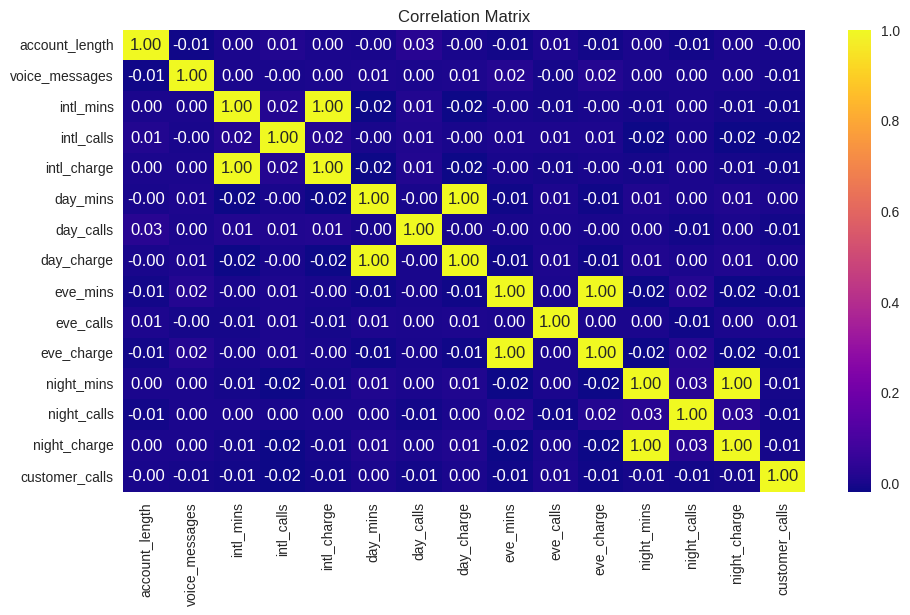

In [80]:
correlation_matrix = df.corr()
plt.figure(figsize=(11, 6))
sns.heatmap(correlation_matrix, cmap='plasma', annot=True,  fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Highly correlated columns
### 1) international charges vs internationational min.
### 2) Day charges vs Day min.
### 3) Evening charges vs Evening min.
### 3) Night charges vs Night min.

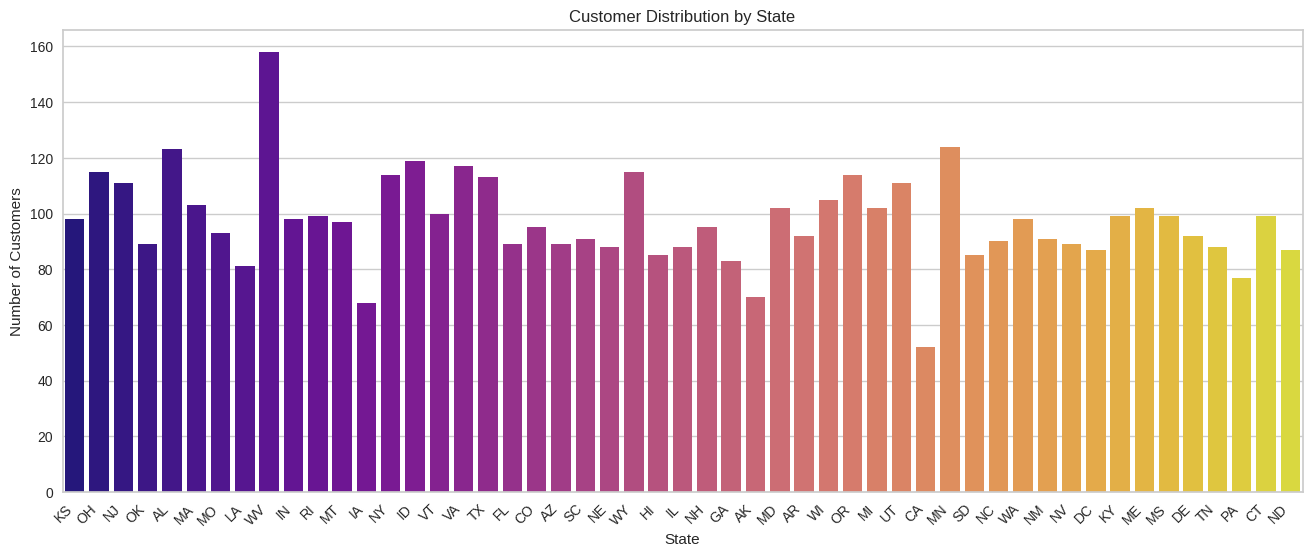

In [81]:
#State wise distribution
plt.figure(figsize=(16, 6))
sns.countplot(x='state', data=df, palette='plasma')
plt.title('Customer Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()

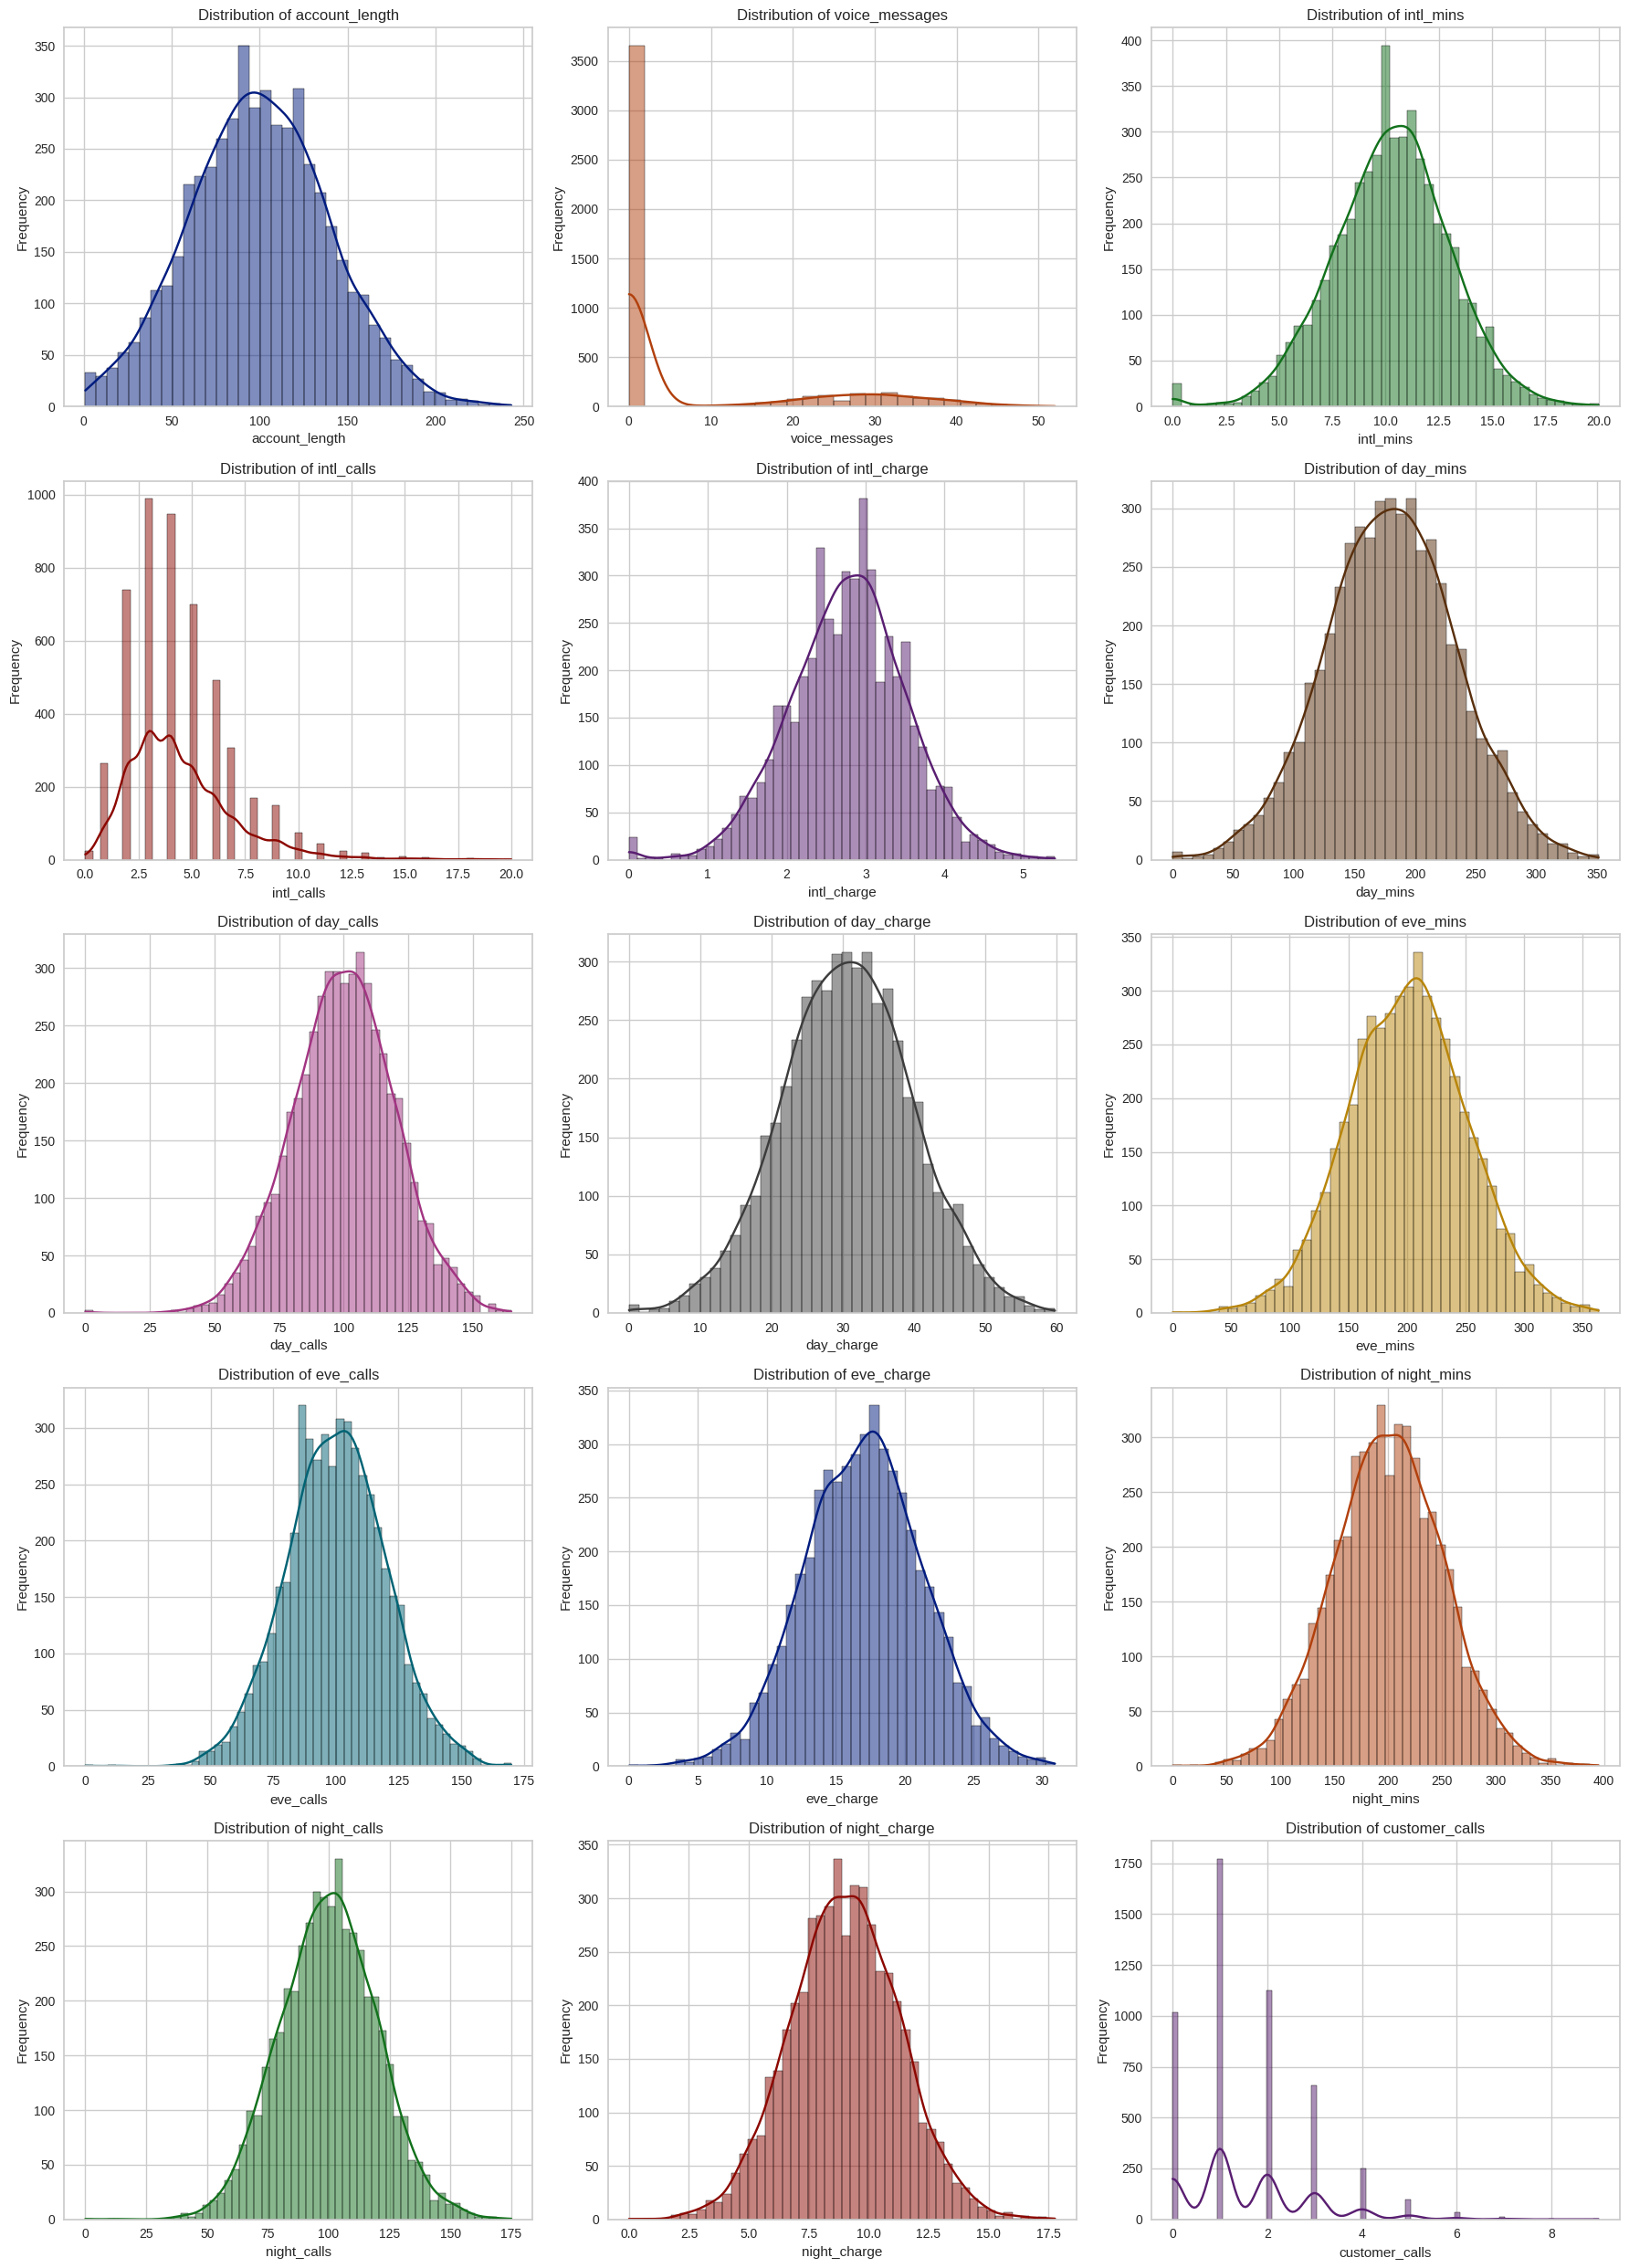

In [82]:
import math
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

discrete_columns = ['intl.calls', 'customer.calls']

num_cols = len(numerical_columns)
num_rows = math.ceil(num_cols / 3)

colors = sns.color_palette("dark", num_cols)

plt.figure(figsize=(18, 5 * num_rows))
for i, col in enumerate(numerical_columns):
    plt.subplot(num_rows, 3, i + 1)

    if col in discrete_columns:
        # Bar plot for discrete variables
        sns.countplot(x=col, data=df, color=colors[i])
    else:
        # Histogram for continuous variables
        sns.histplot(df[col], kde=True, color=colors[i])

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

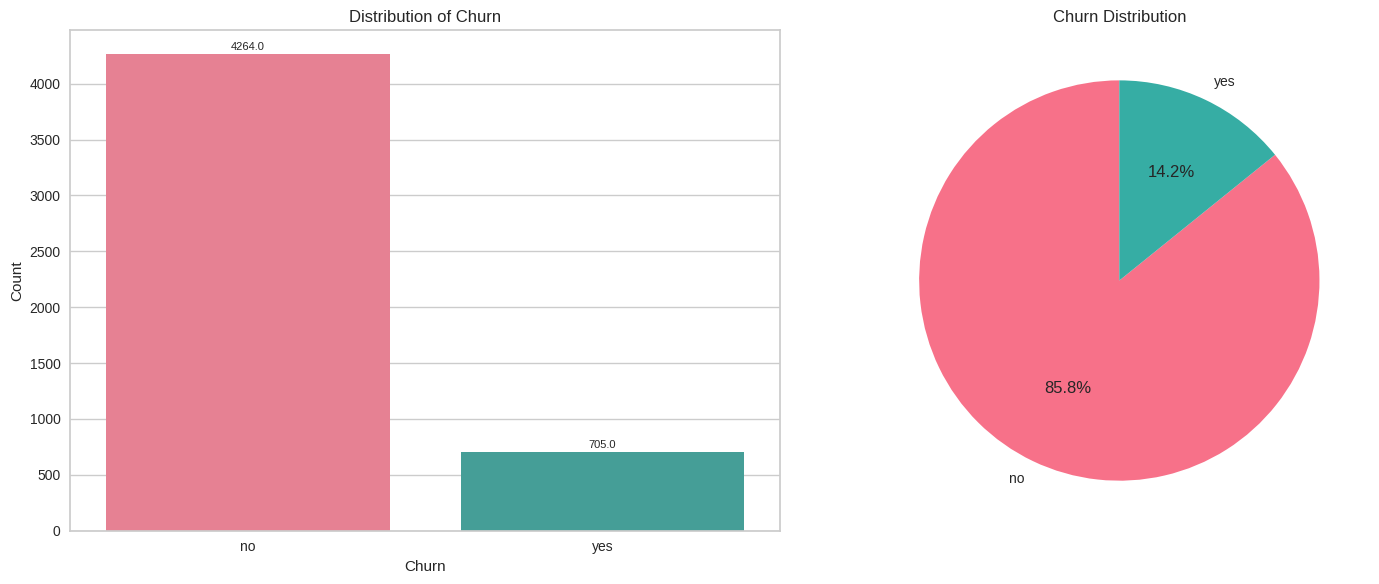

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot
plt.subplot(1, 2, 1)
churn_plot = sns.countplot(x='churn', data=df, palette='husl')
for p in churn_plot.patches:
    churn_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

# Pie chart
plt.subplot(1, 2, 2)
churn_counts = df['churn'].value_counts()
colors = sns.color_palette('husl', len(churn_counts))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Churn Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

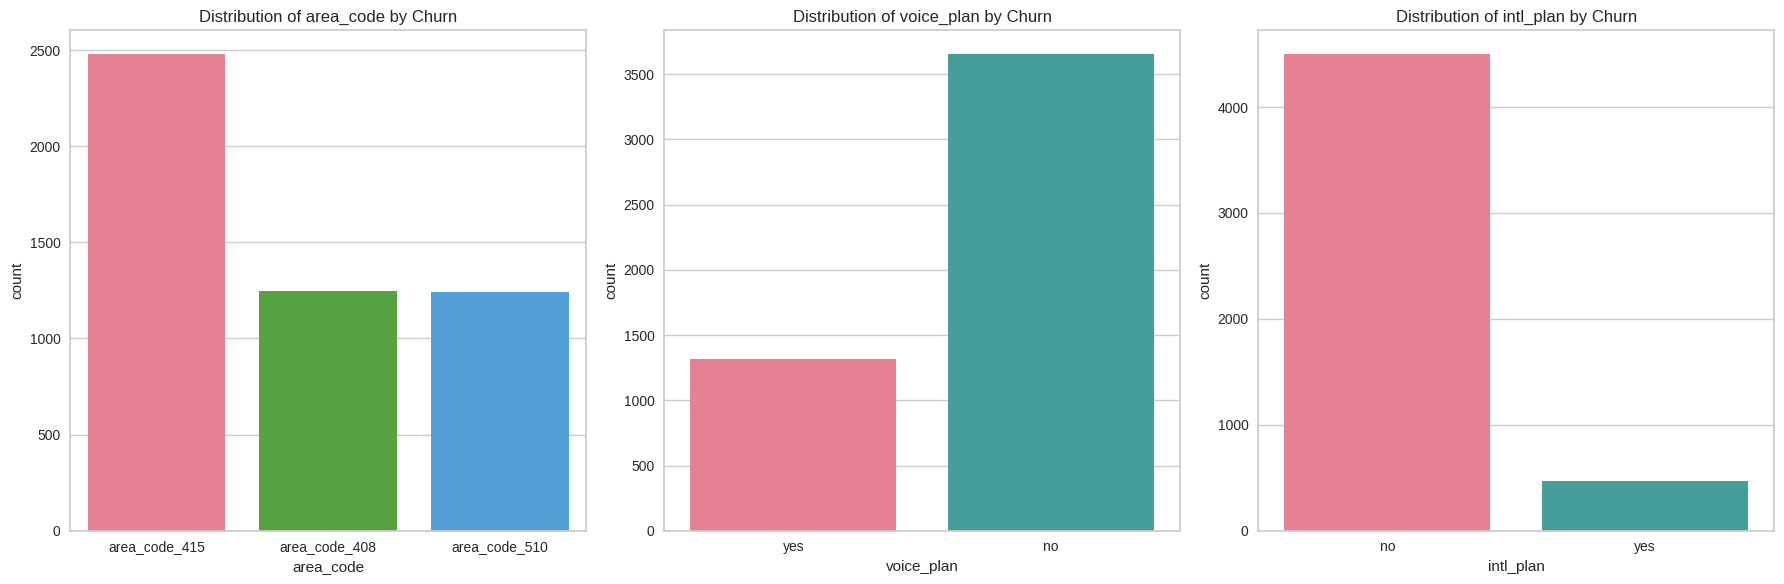

In [84]:
categorical_cols = ['area_code', 'voice_plan', 'intl_plan']
plt.figure(figsize=(18, 6))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, len(categorical_cols), i)  # Specify the subplot position
    sns.countplot(x=col, data=df, palette='husl')
    plt.title(f'Distribution of {col} by Churn')

plt.tight_layout()
plt.show()

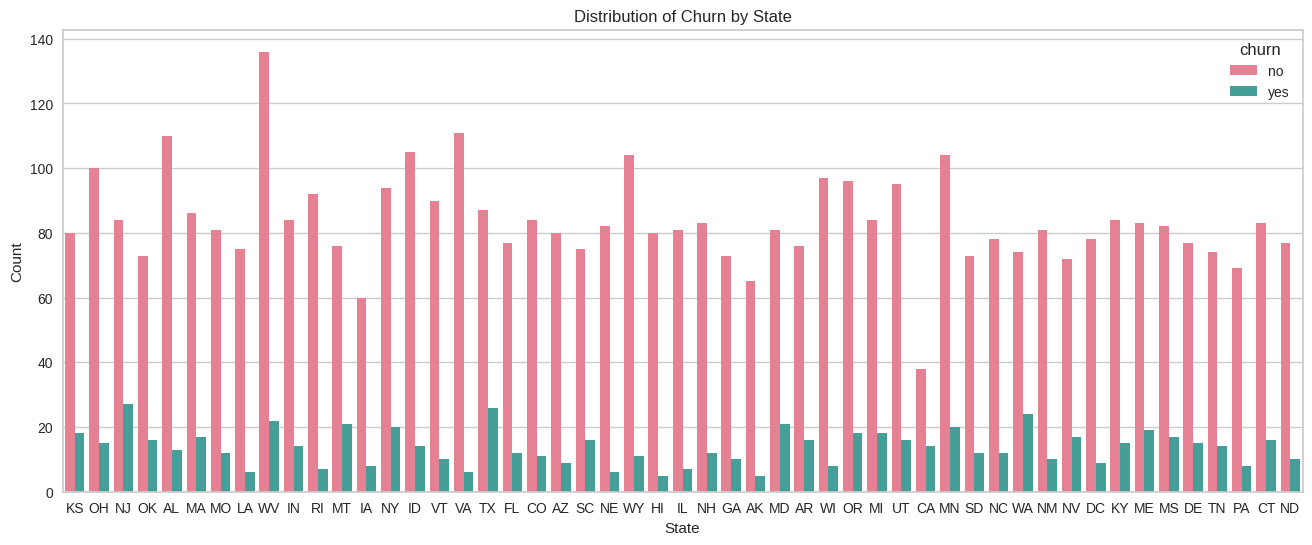

In [85]:
plt.figure(figsize=(16, 6))
sns.countplot(x='state', hue='churn', data=df, palette='husl')
plt.title('Distribution of Churn by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

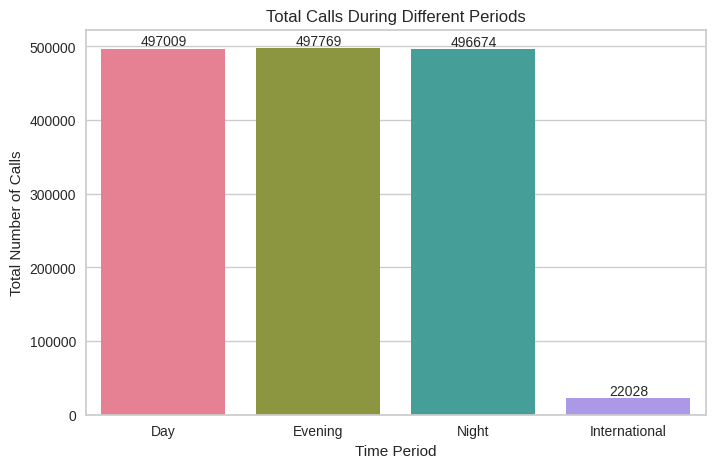

In [86]:
# Calculate the sum of calls for each period
total_day_calls = df['day_calls'].sum()
total_eve_calls = df['eve_calls'].sum()
total_night_calls = df['night_calls'].sum()
total_intl_calls = df['intl_calls'].sum()

# Create a bar plot
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(
    x=['Day', 'Evening', 'Night', 'International'],
    y=[total_day_calls, total_eve_calls, total_night_calls, total_intl_calls],
    palette='husl'
)

# Annotate with the exact numbers on top of each bar (smaller font size)
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

# Customize the plot
plt.title('Total Calls During Different Periods')
plt.xlabel('Time Period')
plt.ylabel('Total Number of Calls')

# Show the plot
plt.show()

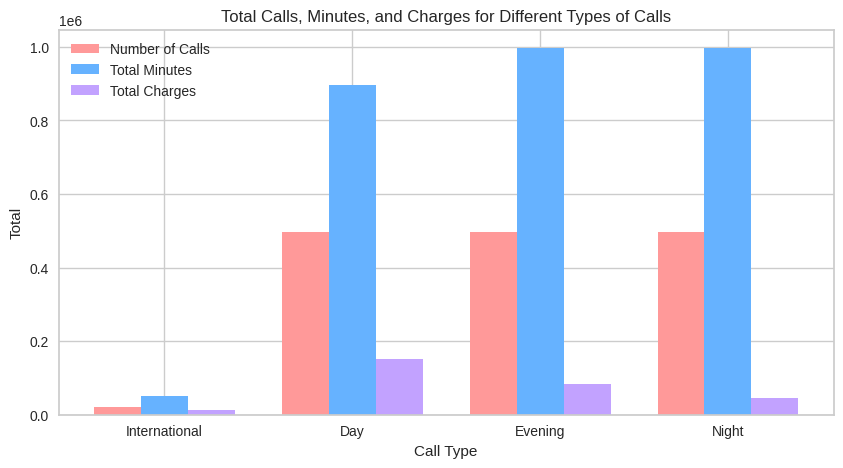

In [87]:
total_intl_calls = df['intl_calls'].sum()
total_intl_mins = df['intl_mins'].sum()
total_intl_charge = df['intl_charge'].sum()

total_day_calls = df['day_calls'].sum()
total_day_mins = df['day_mins'].sum()
total_day_charge = df['day_charge'].astype(float).sum()

total_eve_calls = df['eve_calls'].sum()
total_eve_mins = df['eve_mins'].sum()
total_eve_charge = df['eve_charge'].astype(float).sum()

total_night_calls = df['night_calls'].sum()
total_night_mins = df['night_mins'].sum()
total_night_charge = df['night_charge'].astype(float).sum()

colors_calls = '#FF9999'
colors_mins = '#66B2FF'
colors_charge = '#C2A2FF'

plt.figure(figsize=(10, 5))

bar_width = 0.25
index = range(4)

plt.bar(index, [total_intl_calls, total_day_calls, total_eve_calls, total_night_calls],
        width=bar_width, color=colors_calls, label='Number of Calls')
plt.bar([i + bar_width for i in index], [total_intl_mins, total_day_mins, total_eve_mins, total_night_mins],
        width=bar_width, color=colors_mins, label='Total Minutes')
plt.bar([i + 2 * bar_width for i in index], [total_intl_charge, total_day_charge, total_eve_charge, total_night_charge],
        width=bar_width, color=colors_charge, label='Total Charges')

plt.title('Total Calls, Minutes, and Charges for Different Types of Calls')
plt.xlabel('Call Type')
plt.ylabel('Total')
plt.xticks([i + bar_width for i in index], ['International', 'Day', 'Evening', 'Night'])
plt.legend()

plt.show()

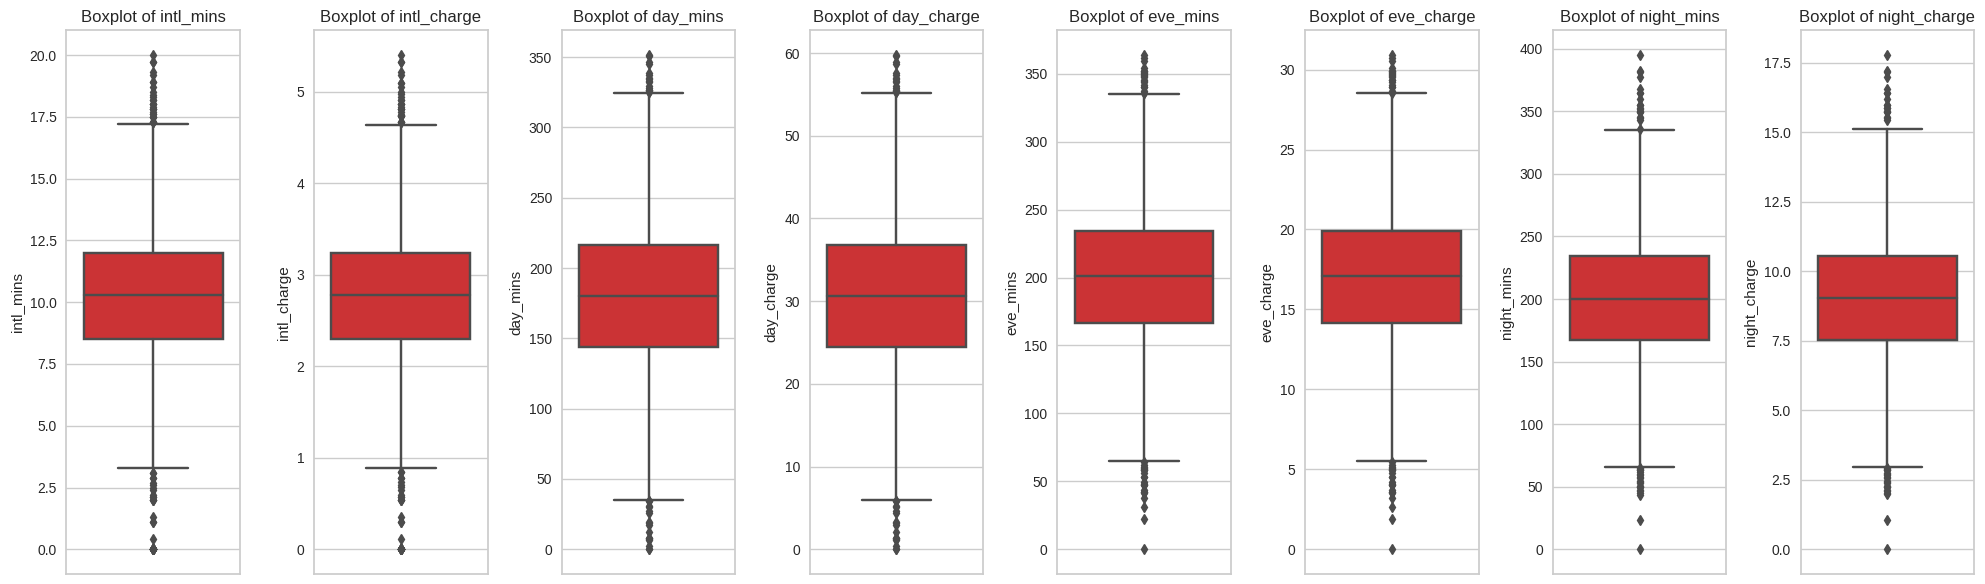

Number of outliers in intl_mins: 71
Number of outliers in intl_charge: 71
Number of outliers in day_mins: 34
Number of outliers in day_charge: 34
Number of outliers in eve_mins: 43
Number of outliers in eve_charge: 42
Number of outliers in night_mins: 40
Number of outliers in night_charge: 39


In [88]:

# Identify continuous columns
continuous_columns = df.select_dtypes(include=['float64']).columns

# Set up subplots
fig, axes = plt.subplots(ncols=len(continuous_columns), figsize=(20, 6))

# Count outliers in each column
outlier_counts = []

for i, col in enumerate(continuous_columns):
    sns.boxplot(y=df[col], ax=axes[i], palette='Set1')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))
    outlier_count = outliers.sum()
    outlier_counts.append(outlier_count)

plt.tight_layout()
plt.show()

# Display outlier counts
for i, col in enumerate(continuous_columns):
    print(f'Number of outliers in {col}: {outlier_counts[i]}')


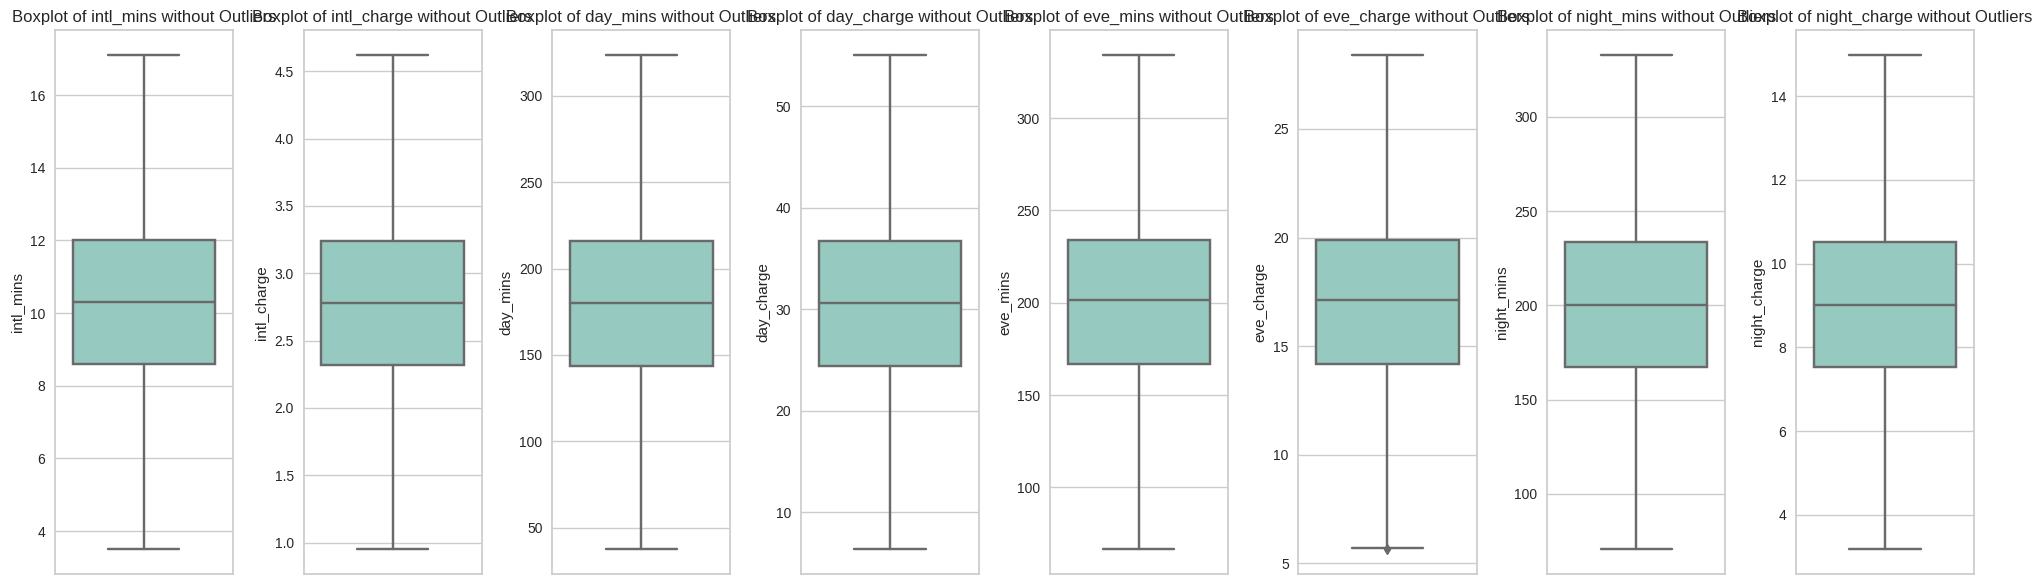

In [89]:
continuous_columns = df.select_dtypes(include=['float64']).columns

for col in continuous_columns:
    # Calculate the IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

fig, axes = plt.subplots(ncols=len(continuous_columns), figsize=(20, 6))

for i, col in enumerate(continuous_columns):
    sns.boxplot(y=df[col], ax=axes[i], palette='Set3')
    axes[i].set_title(f'Boxplot of {col} without Outliers')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [90]:
# labelencoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
  if df[column].dtypes=="object":
    df[column]= le.fit_transform(df[column])

In [91]:
df

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,16,1,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,35,1,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,31,1,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
4,36,1,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0
5,1,2,118,0,0,1,6.3,6,1.70,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,0,50,1,40,0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0
4996,49,1,152,0,0,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,1
4997,7,1,61,0,0,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0
4998,7,2,109,0,0,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0


In [92]:
x = df.drop('churn', axis=1)
y = df['churn']


* ###  Feature Selection:

In [93]:
!pip install yellowbrick
from sklearn.feature_selection import SelectKBest, chi2 ,f_classif, RFE,mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import rfecv

* ## Univariate Selection:

* ### Chi-Square:

In [94]:
test  = SelectKBest(score_func=chi2,k=10)
test_fit=test.fit(x,y)
d={"column":x.columns,"scores":test_fit.scores_}
chi2=pd.DataFrame(d)
chi2.sort_values("scores",ascending=False)

,column,scores
9,day_mins,2538.072193
4,voice_messages,956.234444
11,day_charge,431.429058
12,eve_mins,382.963311
5,intl_plan,286.270126
18,customer_calls,252.710753
15,night_mins,122.086970
3,voice_plan,38.440325
2,account_length,36.687547
14,eve_charge,32.544544


In [95]:
print(x.columns[test.get_support()])

Index(['account_length', 'voice_plan', 'voice_messages', 'intl_plan',
       'day_mins', 'day_charge', 'eve_mins', 'eve_charge', 'night_mins',
       'customer_calls'],
      dtype='object')


* ### Anova:

In [96]:
test1 = SelectKBest(score_func=f_classif,k=10)
test1_fit=test1.fit(x,y)
df1={"column":x.columns,"scores":test_fit.scores_}
anova=pd.DataFrame(d)
anova.sort_values("scores",ascending=False)

,column,scores
9,day_mins,2538.072193
4,voice_messages,956.234444
11,day_charge,431.429058
12,eve_mins,382.963311
5,intl_plan,286.270126
18,customer_calls,252.710753
15,night_mins,122.086970
3,voice_plan,38.440325
2,account_length,36.687547
14,eve_charge,32.544544


In [97]:
test1.get_feature_names_out()

array(['voice_plan', 'voice_messages', 'intl_plan', 'intl_calls',
       'intl_charge', 'day_mins', 'day_charge', 'eve_mins', 'eve_charge',
       'customer_calls'], dtype=object)

## Recursive Feature Elimination with Logistic Regression:

In [98]:
rfe = RFE(LogisticRegression())
rfe.fit(x,y)

RFE(estimator=LogisticRegression())

In [99]:
rfe.ranking_

array([ 3,  1,  6,  1,  1,  1,  1,  1, 10,  2,  1,  7,  5,  1, 11,  8,  4,
        9,  1])

In [100]:
rfe.get_feature_names_out()

array(['area_code', 'voice_plan', 'voice_messages', 'intl_plan',
       'intl_mins', 'intl_calls', 'day_calls', 'eve_calls',
       'customer_calls'], dtype=object)

In [101]:
rfe1={"column":x.columns,"Ranks":rfe.ranking_}
rfedf=pd.DataFrame(rfe1)
rfedf.sort_values("Ranks")

,column,Ranks
18,customer_calls,1
1,area_code,1
13,eve_calls,1
3,voice_plan,1
4,voice_messages,1
5,intl_plan,1
6,intl_mins,1
7,intl_calls,1
10,day_calls,1
9,day_mins,2


## Recursive Feature Elimination with Decision Tree:

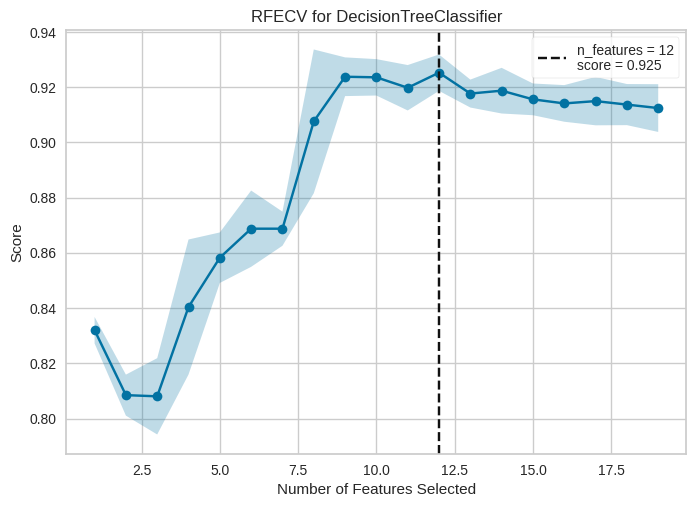

In [102]:
rfe2 = rfecv(DecisionTreeClassifier(),x,y)

In [103]:
rfe2.ranking_

array([3, 8, 2, 5, 1, 1, 4, 1, 1, 1, 1, 1, 1, 7, 1, 1, 6, 1, 1])

In [104]:
rfe2.get_feature_names_out()

array(['x4', 'x5', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x14', 'x15',
       'x17', 'x18'], dtype=object)

In [105]:
rfe2={"column":x.columns,"Ranks":rfe2.ranking_}
rfecvdf=pd.DataFrame(rfe2)
rfecvdf.sort_values("Ranks")

,column,Ranks
9,day_mins,1
15,night_mins,1
14,eve_charge,1
12,eve_mins,1
11,day_charge,1
10,day_calls,1
17,night_charge,1
8,intl_charge,1
18,customer_calls,1
5,intl_plan,1


## Tree Based Method:

In [106]:
dt = DecisionTreeClassifier()

dt.fit(x,y)

DecisionTreeClassifier()

In [107]:
dt.feature_importances_

array([0.00969392, 0.00593926, 0.01850865, 0.00869643, 0.06065088,
       0.07120577, 0.08653938, 0.08436044, 0.02388006, 0.14444738,
       0.02052442, 0.10876501, 0.08834798, 0.01640779, 0.06060753,
       0.03622671, 0.00746911, 0.03617241, 0.11155688])

In [108]:
dt={"column":x.columns,"Imp":dt.feature_importances_}
dtdf=pd.DataFrame(dt)
dtdf.sort_values("Imp",ascending=False)

,column,Imp
9,day_mins,0.144447
18,customer_calls,0.111557
11,day_charge,0.108765
12,eve_mins,0.088348
6,intl_mins,0.086539
7,intl_calls,0.084360
5,intl_plan,0.071206
4,voice_messages,0.060651
14,eve_charge,0.060608
15,night_mins,0.036227


In [109]:
df.columns

Index(['state', 'area_code', 'account_length', 'voice_plan', 'voice_messages',
       'intl_plan', 'intl_mins', 'intl_calls', 'intl_charge', 'day_mins',
       'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge',
       'night_mins', 'night_calls', 'night_charge', 'customer_calls', 'churn'],
      dtype='object')

In [110]:
#dependent & independant variable
X = df[['intl_plan', 'voice_plan', 'day_calls', 'day_mins', 'day_charge', 'eve_calls', 'eve_mins', 'eve_charge', 'night_calls', 'night_mins', 'night_charge']]
y = df.iloc[:,-1]

## Balancing:

In [111]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)

In [112]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_over)))


Original dataset shape Counter({0: 4102, 1: 660})
Resampled dataset shape Counter({0: 4102, 1: 4102})


# Model Building
#-----------------------------------------------------------------------------------------------------------------------------------------------------

In [113]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_over, y_over, test_size=0.2, random_state=42)


In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

##  Define the parameter grid for each model

In [115]:
'''
param_grid_rf = {
    'n_estimators': [25, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [25, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

param_grid_svm = {
    'C': [0.1, 1, 5],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}


param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# Create the GridSearchCV objects for each model
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='f1', n_jobs=-1)
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=3, scoring='f1', n_jobs=-1)
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=3, scoring='f1', n_jobs=-1)
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='f1', n_jobs=-1)

# Fit the models
grid_search_rf.fit(Xtrain, ytrain)
grid_search_gb.fit(Xtrain, ytrain)
grid_search_svm.fit(Xtrain, ytrain)
grid_search_knn.fit(Xtrain, ytrain)

# Get the best parameters and models
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

best_params_gb = grid_search_gb.best_params_
best_model_gb = grid_search_gb.best_estimator_

best_params_svm = grid_search_svm.best_params_
best_model_svm = grid_search_svm.best_estimator_

best_params_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_


# Print the best parameters
print("Best Parameters - Random Forest:", best_params_rf)
print("Best Parameters - Gradient Boosting:", best_params_gb)
print("Best Parameters - SVM:", best_params_svm)
print("Best Parameters - K-Nearest Neighbors:", best_params_knn)'''


'\nparam_grid_rf = {\n    \'n_estimators\': [25, 50, 100],\n    \'max_depth\': [None, 10, 20],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4]\n}\n\nparam_grid_gb = {\n    \'n_estimators\': [25, 50, 100],\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'max_depth\': [3, 5, 7]\n}\n\nparam_grid_svm = {\n    \'C\': [0.1, 1, 5],\n    \'kernel\': [\'linear\', \'rbf\'],\n    \'gamma\': [\'scale\', \'auto\']\n}\n\n\nparam_grid_knn = {\n    \'n_neighbors\': [3, 5, 7],\n    \'weights\': [\'uniform\', \'distance\']\n}\n\n# Create the GridSearchCV objects for each model\ngrid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring=\'f1\', n_jobs=-1)\ngrid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=3, scoring=\'f1\', n_jobs=-1)\ngrid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=3, scoring=\'f1\', n_jobs=-1)\ngrid_search_knn = GridSearchCV(KNeighborsClassifier(), pa

## Model fitting

In [116]:
# LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(Xtrain, ytrain)

# Random Forest
best_params_rf = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
rf_model = RandomForestClassifier(**best_params_rf)
rf_model.fit(Xtrain, ytrain)

# Gradient Boosting
best_params_gb = {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
gb_model = GradientBoostingClassifier(**best_params_gb)
gb_model.fit(Xtrain, ytrain)

# SVM
best_params_svm = {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
svm_model = SVC(**best_params_svm)
svm_model.fit(Xtrain, ytrain)

# KNN
best_params_knn = {'n_neighbors': 3, 'weights': 'distance'}
knn_model = KNeighborsClassifier(**best_params_knn)
knn_model.fit(Xtrain, ytrain)

# Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(Xtrain, ytrain)

GaussianNB()

In [117]:
ypred_lr = lr_model.predict(Xtest)
ypred_rf = rf_model.predict(Xtest)
ypred_gb = gb_model.predict(Xtest)
ypred_svm = svm_model.predict(Xtest)
ypred_knn = knn_model.predict(Xtest)
ypred_nb = nb_model.predict(Xtest)

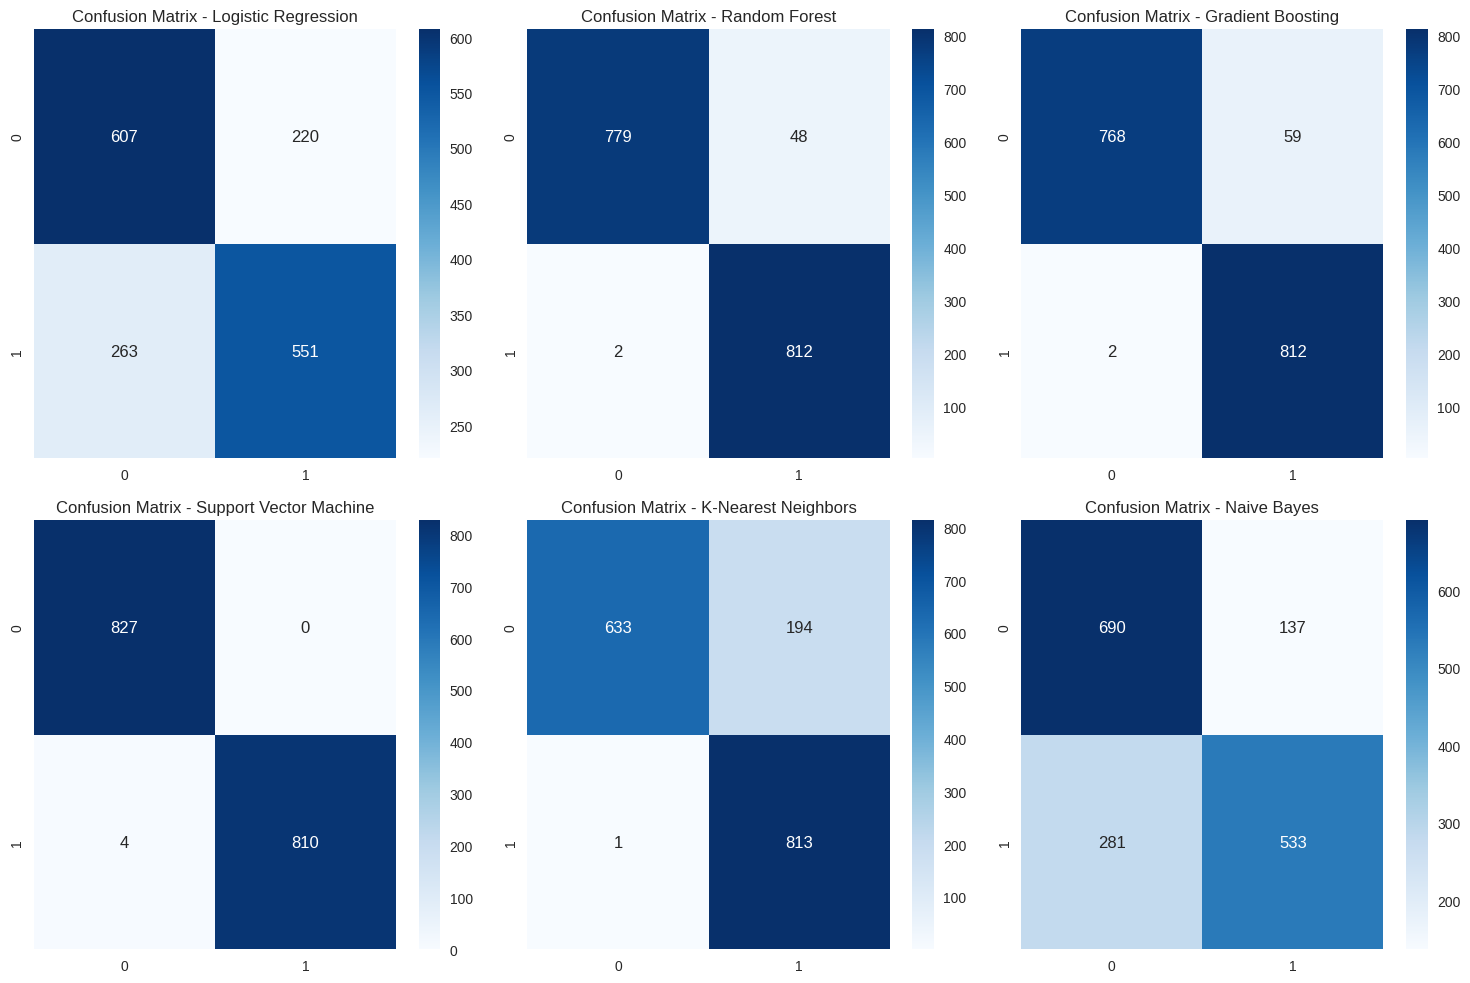

In [118]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the models and their predictions (ypred_...) defined

models = ["Logistic Regression", "Random Forest", "Gradient Boosting", "Support Vector Machine", "K-Nearest Neighbors", "Naive Bayes"]
predictions = [ypred_lr, ypred_rf, ypred_gb, ypred_svm, ypred_knn, ypred_nb]

# Create a 2x3 grid for the confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the 2x3 grid for easier indexing
axes = axes.flatten()

# Loop through each model and plot its confusion matrix
for i, model_name in enumerate(models):
    conf_matrix = confusion_matrix(ytest, predictions[i])
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {model_name}")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


Here we get maximum value for True postive & True negative for Gradient Boosting Model

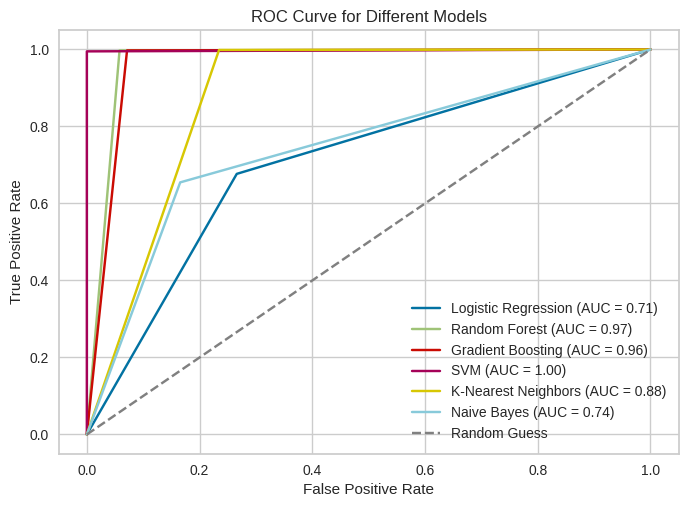

In [119]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt



# Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(ytest, ypred_lr)
roc_auc_lr = roc_auc_score(ytest, ypred_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(ytest, ypred_rf)
roc_auc_rf = roc_auc_score(ytest, ypred_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Gradient Boosting
fpr_gb, tpr_gb, thresholds_gb = roc_curve(ytest, ypred_gb)
roc_auc_gb = roc_auc_score(ytest, ypred_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

# Support Vector Machine
fpr_svm, tpr_svm, thresholds_svm = roc_curve(ytest, ypred_svm)
roc_auc_svm = roc_auc_score(ytest, ypred_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')

# K-Nearest Neighbors
fpr_knn, tpr_knn, thresholds_knn = roc_curve(ytest, ypred_knn)
roc_auc_knn = roc_auc_score(ytest, ypred_knn)
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')

# K-Nearest Neighbors
fpr_nb, tpr_nb, thresholds_nb = roc_curve(ytest, ypred_nb)
roc_auc_nb = roc_auc_score(ytest, ypred_nb)
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')


# Plotting
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend()
plt.show()


In [120]:
from sklearn.metrics import accuracy_score

# Assuming ytest is your true labels

# Logistic Regression
accuracy_lr = accuracy_score(ytest, ypred_lr)
print("Accuracy - Logistic Regression:", accuracy_lr)

# Random Forest
accuracy_rf = accuracy_score(ytest, ypred_rf)
print("Accuracy - Random Forest:", accuracy_rf)

# Gradient Boosting
accuracy_gb = accuracy_score(ytest, ypred_gb)
print("Accuracy - Gradient Boosting:", accuracy_gb)

# Support Vector Machine
accuracy_svm = accuracy_score(ytest, ypred_svm)
print("Accuracy - Support Vector Machine:", accuracy_svm)

# K-Nearest Neighbors
accuracy_knn = accuracy_score(ytest, ypred_knn)
print("Accuracy - K-Nearest Neighbors:", accuracy_knn)


Accuracy - Logistic Regression: 0.7056672760511883
Accuracy - Random Forest: 0.9695307739183425
Accuracy - Gradient Boosting: 0.9628275441803779
Accuracy - Support Vector Machine: 0.9975624619134674
Accuracy - K-Nearest Neighbors: 0.8811700182815356


In [121]:
df.to_csv('df_after_eda.csv', index=False)

In [140]:
from sklearn.metrics import classification_report
models = ["Logistic Regression", "Random Forest", "Gradient Boosting", "Support Vector Machine", "K-Nearest Neighbors", "Naive Bayes"]
predictions = [ypred_lr, ypred_rf, ypred_gb, ypred_svm, ypred_knn, ypred_nb]


In [141]:
#classification report of different models

for i, model_name in enumerate(models):
    print(f"Classification Report - {model_name}")
    print(classification_report(ytest, predictions[i]))


Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.70      0.73      0.72       827
           1       0.71      0.68      0.70       814

    accuracy                           0.71      1641
   macro avg       0.71      0.71      0.71      1641
weighted avg       0.71      0.71      0.71      1641

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       827
           1       0.94      1.00      0.97       814

    accuracy                           0.97      1641
   macro avg       0.97      0.97      0.97      1641
weighted avg       0.97      0.97      0.97      1641

Classification Report - Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       827
           1       0.93      1.00      0.96       814

    accuracy                           0.96      1641
   m

#### Pickling the model

In [122]:
import pickle

In [123]:
filename = 'model_svm.sav'

In [124]:
pickle.dump(svm_model, open(filename, 'wb'))

In [125]:
load_model = pickle.load(open(filename, 'rb'))

In [126]:
model_score_svm= load_model.score(Xtest, ytest)

In [127]:
model_score_svm

0.9975624619134674

In [135]:
df_copy[['intl_plan', 'voice_plan', 'day_calls', 'day_mins', 'day_charge', 'eve_calls', 'eve_mins', 'eve_charge', 'night_calls', 'night_mins', 'night_charge','churn']].head(20)

,intl_plan,voice_plan,day_calls,day_mins,day_charge,eve_calls,eve_mins,eve_charge,night_calls,night_mins,night_charge,churn
0,no,yes,110,265.1,45.07,99,197.4,16.78,91,244.7,11.01,no
1,no,yes,123,161.6,27.47,103,195.5,16.62,103,254.4,11.45,no
2,no,no,114,243.4,41.38,110,121.2,10.30,104,162.6,7.32,no
3,yes,no,71,299.4,50.9,88,61.9,5.26,89,196.9,8.86,no
4,yes,no,113,166.7,28.34,122,148.3,12.61,121,186.9,8.41,no
5,yes,no,98,223.4,37.98,101,220.6,18.75,118,203.9,9.18,no
6,no,yes,88,218.2,37.09,108,348.5,29.62,118,212.6,9.57,no
7,yes,no,79,157.0,26.69,94,103.1,8.76,96,211.8,9.53,no
8,no,no,97,184.5,31.37,80,351.6,29.89,90,215.8,9.71,no
9,yes,yes,84,258.6,43.96,111,222,18.87,97,326.4,14.69,no


In [136]:
df[['intl_plan', 'voice_plan', 'day_calls', 'day_mins', 'day_charge', 'eve_calls', 'eve_mins', 'eve_charge', 'night_calls', 'night_mins', 'night_charge','churn']]

,intl_plan,voice_plan,day_calls,day_mins,day_charge,eve_calls,eve_mins,eve_charge,night_calls,night_mins,night_charge,churn
0,0,1,110,265.1,45.07,99,197.4,16.78,91,244.7,11.01,0
1,0,1,123,161.6,27.47,103,195.5,16.62,103,254.4,11.45,0
2,0,0,114,243.4,41.38,110,121.2,10.30,104,162.6,7.32,0
4,1,0,113,166.7,28.34,122,148.3,12.61,121,186.9,8.41,0
5,1,0,98,223.4,37.98,101,220.6,18.75,118,203.9,9.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,127,235.7,40.07,126,223.0,18.96,116,297.5,13.39,0
4996,0,0,90,184.2,31.31,73,256.8,21.83,113,213.6,9.61,1
4997,0,0,89,140.6,23.90,128,172.8,14.69,97,212.4,9.56,0
4998,0,0,67,188.8,32.10,92,171.7,14.59,89,224.4,10.10,0
